In [1]:
from numpy import *
from numpy.linalg import norm
import matplotlib.pyplot as plt

In [2]:
# número de Reynolds para esfera lisa com
# diametro D
# velocidade (módulo) V 
# viscosidade visco

Re = lambda rho,D,V,visco: rho*D*V/visco

# velocidade em função de Re, rho, D e visco
Velocidade = lambda Re,rho,D,visco: Re*visco/(rho*D)

# O Coeficiente de Arrasto (CA) para bola lisa, para cada número de Re é medido experimentalmente no tunel do vento.
# Contudo Morrison escreveu uma função que calcula o CA aproximadamente para cada Re (1e-1<=Re<=1e6).
# Referência: F A. Morrison, Data Correlation for Drag Coefficient for Sphere, http://www.chem.mtu.edu/~fmorriso/ DataCorrelationForSphereDrag2013.pdf
#CAMorrison = lambda re: 24/re + 2.6*(re/5)/(1+(re/5)**(1.52)) + 0.411*(re/263000)**(-7.94)/(1+(re/263000)**(-8))+re**0.8/461000
CAMorrison = lambda re: 24/re + 2.6*(re/5)/(1+(re/5)**(1.52)) + 0.411*(re/263000)**(-7.94)/(1+(re/263000)**(-8)) + (0.25*(re/1e6))/(1+(re/1e6))

FArrasto = lambda CA,rho,A,nv,vuni: 0.5*CA*rho*A*nv*nv*(-vuni)

FSustentacao = lambda CM,rho,A,r,omega,vel: 0.5*CM*rho*A*r*cross(omega,vel)

In [3]:
def magnus_effect_simulation(m_bola,pos_ini,v0,D,A,omega):
    # Informacoes do ambiente de simulacao
    rho = 1.224 # kg/m3, densidade do ar
    visco =1.83e-5 # kg/(ms), viscosidade do ar
    CM = 1 # coeficiente de Magnus
    g = 9.81*array([0, 0, -1]) # m/s2, aceleracao da gravidade

    # metodo de Euler
    # para calcular a velocidade e posicao a partir da aceleracao
    tini = 0 # s
    tfin = 15 # s
    h = 1e-3
    n = int((tfin-tini)/h)
    vel = v0
    pos = zeros((3,n)) # Matriz em que cada linha representa uma coordenada e a coluna representa a variacao no tempo

    pos[:,0] = pos_ini # ponto inicial da bola
    tempo = 0 # inicio do v0o

    for i in range(0, n-1):
        nv = norm(vel) # normaliza o vetor velocidade de translacao da bola

        # Tratamento para caso vel = 0
        # nv=norma da velocidade, nv<1e-6 significa velocidade nula
        # Isto pode acontecer se quisermos simular a queda da bola
        # velocidade=0 produz Re=0 e CAMorrison(0) esta indefinido!
        if(nv < 1e-6):
            CA=0 # se velocidade eh zero, nao temos arrasto.
            vuni=vel*0
        else:
            CA=CAMorrison(Re(rho,D,nv,visco))
            vuni=vel/nv

        # Forcas atuantes sobre a bola
        FA = FArrasto(CA, rho, A, nv,vuni)
        FS = FSustentacao(CM, rho, A, D / 2, omega, vel)
        FG = m_bola * g

        # metodo de Euler        
        vel = vel + (h * (FG + FS + FA ) / m_bola) # v_i+1 = v_i + a * h 
        pos[:,i+1] = pos[:,i] + h * vel # r_i+1 = r_i + v_i * h

        if (pos[2,i+1] < 0): # se a posicao da bola estiver abaixo do chao
            break

        tempo = tempo + h

    pos = pos[:,:i+2]

    return tempo, pos  

Tempo de voo: 6.5e+00 s.


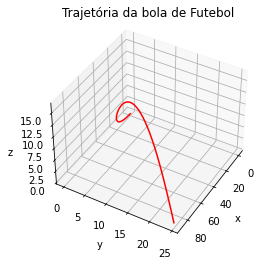

In [117]:
# Informações da Bola de Futebol
m_fut = 0.454 # kg, massa da bola
D_fut = 22.2e-2 # 22,2cm, diâmetro
A_fut = pi* (D_fut / 2) ** 2 # area da secção transversal da bola de futebol
v0_fut = array([30,0,0]) # velocidade inicial
p0_fut = array([0, 0, 0.1]) # m, posição inicial
omega_fut = array([10,-100,20]) # direção de giro

tempo, pos = magnus_effect_simulation(m_fut,p0_fut,v0_fut,D_fut,A_fut,omega_fut)

print('Tempo de voo: %.1e s.' %(tempo))

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
plt.title("Trajetória da bola de Futebol")
ax.view_init(40, 30)
ax.plot3D(pos[0,:],pos[1,:],pos[2,:],'red')


Tempo de voo: 6.6e+00 s.


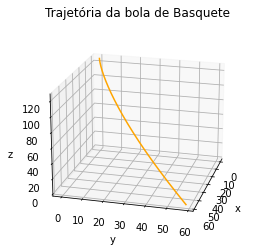

In [119]:
# Informações da Bola de Basquete

m_bas = 0.600 # kg, massa da bola
D_bas = 24.3e-2 # 24,3cm, diâmetro
A_bas = pi* (D_fut / 2) ** 2 # area da secção transversal da bola
v0_bas = array([0,0,0]) # velocidade inicial
p0_bas = array([0, 0, 126.5]) # m, posição inicial
omega_bas = array([45,-45,0]) # direção de giro

tempo, pos = magnus_effect_simulation(m_bas,p0_bas,v0_bas,D_bas,A_bas,omega_bas)

print('Tempo de voo: %.1e s.' %(tempo))

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

ax.view_init(20, 15)

plt.title("Trajetória da bola de Basquete")
ax.plot3D(pos[0,:],pos[1,:],pos[2,:],'orange')



Tempo de voo: 7.2e+00 s.


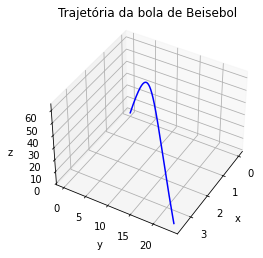

In [121]:
# Informações da Bola de beisebol

m_bei = 0.145 # kg, massa da bola
D_bei = 7.3e-2 # 21cm, diâmetro
A_bei = pi* (D_bei / 2) ** 2 # area da secção transversal da bola
v0_bei = array([0.5,5,45]) # velocidade inicial
p0_bei = array([0, 0, 1.80]) # m, posição inicial
omega_bei = array([-10,10,0]) # direção de giro

tempo, pos = magnus_effect_simulation(m_bei,p0_bei,v0_bei,D_bei,A_bei,omega_bei)

print('Tempo de voo: %.1e s.' %(tempo))

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

ax.view_init(40, 30)

plt.title("Trajetória da bola de Beisebol")

ax.plot3D(pos[0,:],pos[1,:],pos[2,:],'blue')

Tempo de voo: 7.5e+00 s.


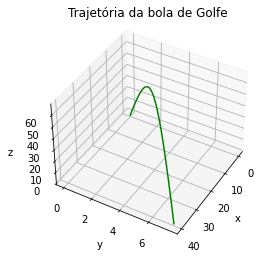

In [124]:
# Informações da Bola de golfe

m_gol = 0.046 # kg, massa da bola
D_gol = 4.3e-2 # 21cm, diâmetro
A_gol = pi* (D_gol / 2) ** 2 # area da secção transversal da bola
v0_gol = array([10,2,50]) # velocidade inicial
p0_gol = array([0, 0, 0]) # m, posição inicial
omega_gol = array([10,-20,0]) # direção de giro

tempo, pos = magnus_effect_simulation(m_gol,p0_gol,v0_gol,D_gol,A_gol,omega_gol)

print('Tempo de voo: %.1e s.' %(tempo))

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

ax.view_init(40, 30)

plt.title("Trajetória da bola de Golfe")

ax.plot3D(pos[0,:],pos[1,:],pos[2,:],'green')